# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to your cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
ser = pd.Series(cities, copy=False)
ser_cap = ser.str.capitalize()
cities = ser_cap.tolist()
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [130]:
# Build query URL and request your results in Celsius

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
total = len(cities) 

query_url = f"{url}appid={weather_api_key}&units={units}&q="

#Build lists to hold output
City = []
Lat = []
Lng = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Get weather data for each city in list
print("Beginning Data Retrieval")
print("-----------------------------")

for city in cities:
    try:
        index = cities.index(f'{city}')+1
        print(f'Processing Record {index} of {total} | {city}')
        response = requests.get(query_url + city).json()
        City.append(response['name'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_Temp.append(response['main']['temp_max'])
        Humidity.append(response['main']['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Wind_Speed.append(response['wind']['speed'])
        Country.append(response['sys']['country'])
        Date.append(response['dt']) 
    except:
        print("City not found. Skipping...")
        pass
      
print("-----------------------------")
print("Data Retrieval Complete ")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 617 | Champoton
Processing Record 2 of 617 | Champasak
Processing Record 3 of 617 | Punta arenas
Processing Record 4 of 617 | Lalibela
Processing Record 5 of 617 | Kaitangata
Processing Record 6 of 617 | Thompson
Processing Record 7 of 617 | Avarua
Processing Record 8 of 617 | Fortuna
Processing Record 9 of 617 | Hobart
Processing Record 10 of 617 | Mataura
Processing Record 11 of 617 | Asosa
Processing Record 12 of 617 | Komsomolskiy
Processing Record 13 of 617 | Upernavik
Processing Record 14 of 617 | Chicama
Processing Record 15 of 617 | Port alfred
Processing Record 16 of 617 | Yerbogachen
Processing Record 17 of 617 | Bozoum
Processing Record 18 of 617 | Sola
Processing Record 19 of 617 | Ushuaia
Processing Record 20 of 617 | Katsuura
Processing Record 21 of 617 | Hervey bay
Processing Record 22 of 617 | Kruisfontein
Processing Record 23 of 617 | Lagoa
Processing Record 24 of 617 | Puerto ayora
Processin

Processing Record 194 of 617 | Salalah
Processing Record 195 of 617 | Jalu
Processing Record 196 of 617 | Alice springs
Processing Record 197 of 617 | Lebu
Processing Record 198 of 617 | Kavaratti
Processing Record 199 of 617 | Boden
Processing Record 200 of 617 | Williams lake
Processing Record 201 of 617 | Honiara
Processing Record 202 of 617 | Vaitupu
City not found. Skipping...
Processing Record 203 of 617 | Gorontalo
Processing Record 204 of 617 | Mirnyy
Processing Record 205 of 617 | Talnakh
Processing Record 206 of 617 | Kodiak
Processing Record 207 of 617 | Bethanien
Processing Record 208 of 617 | Butembo
Processing Record 209 of 617 | Wau
Processing Record 210 of 617 | Soimi
Processing Record 211 of 617 | Rockhampton
Processing Record 212 of 617 | Inhambane
Processing Record 213 of 617 | Aras
Processing Record 214 of 617 | Uusikaupunki
Processing Record 215 of 617 | Ponta do sol
Processing Record 216 of 617 | Nantucket
Processing Record 217 of 617 | Birao
Processing Record 218

Processing Record 390 of 617 | Xichang
Processing Record 391 of 617 | Tautira
Processing Record 392 of 617 | Labuhan
Processing Record 393 of 617 | Maine-soroa
Processing Record 394 of 617 | Bolungarvik
City not found. Skipping...
Processing Record 395 of 617 | Bay roberts
Processing Record 396 of 617 | Huancabamba
Processing Record 397 of 617 | Fairbanks
Processing Record 398 of 617 | Nuqui
Processing Record 399 of 617 | Halalo
City not found. Skipping...
Processing Record 400 of 617 | Labe
Processing Record 401 of 617 | Jutai
Processing Record 402 of 617 | Bokspits
City not found. Skipping...
Processing Record 403 of 617 | Tanete
Processing Record 404 of 617 | Nagato
Processing Record 405 of 617 | Provideniya
Processing Record 406 of 617 | Bemidji
Processing Record 407 of 617 | Fortuna foothills
Processing Record 408 of 617 | El vigia
Processing Record 409 of 617 | Portland
Processing Record 410 of 617 | Lorengau
Processing Record 411 of 617 | Yulara
Processing Record 412 of 617 | Pa

Processing Record 584 of 617 | Atambua
Processing Record 585 of 617 | Pombia
Processing Record 586 of 617 | Aquiraz
Processing Record 587 of 617 | Narsaq
Processing Record 588 of 617 | Biak
Processing Record 589 of 617 | Harur
Processing Record 590 of 617 | Jagraon
Processing Record 591 of 617 | Namibe
Processing Record 592 of 617 | Sao joao da barra
Processing Record 593 of 617 | Kieta
Processing Record 594 of 617 | Tura
Processing Record 595 of 617 | Guanica
Processing Record 596 of 617 | Marsabit
Processing Record 597 of 617 | Huarmey
Processing Record 598 of 617 | Ambon
Processing Record 599 of 617 | Vaitape
Processing Record 600 of 617 | Ust-tsilma
Processing Record 601 of 617 | Marcona
City not found. Skipping...
Processing Record 602 of 617 | Barbar
City not found. Skipping...
Processing Record 603 of 617 | Sembakung
Processing Record 604 of 617 | Buqayq
City not found. Skipping...
Processing Record 605 of 617 | Ekibastuz
Processing Record 606 of 617 | Hay river
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [133]:
#Build dataframe from lists
city_data = pd.DataFrame({
    'City': City,
    'Latitude': Lat,
    'Longitude': Lng,
    'Max Temp. (F)': Max_Temp,
    'Humidity (%)': Humidity,
    'Cloudiness (%)': Cloudiness,
    'Wind Speed (mph)': Wind_Speed,
    'Country Code': Country,
    'Date': Date
})

#Export data to CSV
city_data.to_csv('Outputs/city_data.csv')

In [134]:
#Visualize data
city_data.head()

,City,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date
0,Champotón,19.3500,-90.7167,80.11,77,22,6.31,MX,1632199520
1,Champasak,14.7500,106.0000,83.28,66,90,3.15,LA,1632199607
2,Punta Arenas,-53.1500,-70.9167,53.71,66,75,25.32,CL,1632199338
3,Lalibela,12.0333,39.0333,63.77,48,65,3.29,ET,1632199607
4,Kaitangata,-46.2817,169.8464,48.65,89,100,7.34,NZ,1632199608


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [135]:
city_data.sort_values(by=['Humidity (%)'], ascending=False)

#This dataframe does not contain humidity values >100%

,City,Latitude,Longitude,Max Temp. (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country Code,Date
89,Baie-Comeau,49.2168,-68.1489,62.60,100,1,0.00,CA,1632199641
542,Pombia,45.6530,8.6336,58.71,100,40,2.30,IT,1632199819
283,Plérin,48.5425,-2.7798,58.48,100,90,4.61,FR,1632199717
91,Yellowknife,62.4560,-114.3525,43.32,100,75,8.05,CA,1632199642
479,Gezing,47.9178,13.1299,46.65,100,75,3.44,AT,1632199793
...,...,...,...,...,...,...,...,...,...
536,Arlit,18.7369,7.3853,86.52,12,0,9.15,NE,1632199817
339,Townsville,-19.2500,146.8000,92.28,11,0,16.11,AU,1632199739
143,Port Hedland,-20.3167,118.5667,96.85,11,69,21.85,AU,1632199662
512,Taoudenni,22.6783,-3.9836,89.46,11,0,8.32,ML,1632199807


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

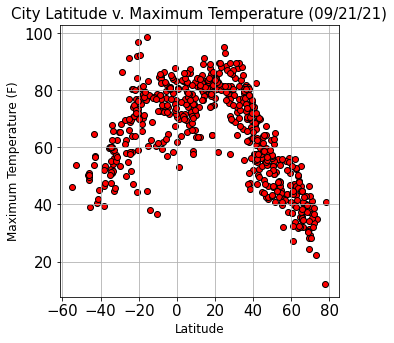

In [136]:
# Generate temperature scatterplot 

Latitude = city_data['Latitude']
Temperature = city_data['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Maximum Temperature (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Temperature, marker="o", color="red",edgecolors='black')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and maximum temperature on September 21. The plot shows that maximum temperatures decrease moving away from the equator. 

## Latitude vs. Humidity Plot

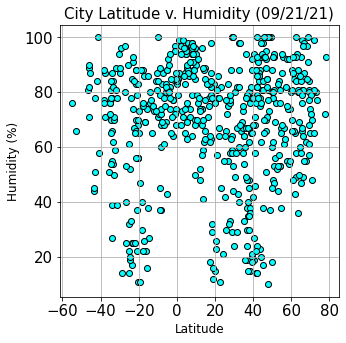

In [137]:
# Generate humidity scatterplot 

Latitude = city_data['Latitude']
Humidity = city_data['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Humidity (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Humidity, marker="o", color="aqua",edgecolors='black')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and percent humidity on September 21. The plot shows no strong relationship between distance from the equator and percent humidity. 

## Latitude vs. Cloudiness Plot

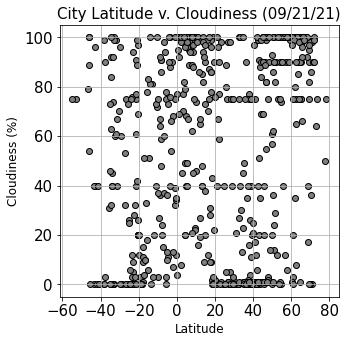

In [138]:
# Generate cloudiness scatterplot 

Latitude = city_data['Latitude']
Clouds = city_data['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Cloudiness (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Clouds, marker="o", color="grey",edgecolors='black')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and cloud cover on September 21. The plot shows no strong relationship between distance from the equator and cloud cover.

## Latitude vs. Wind Speed Plot

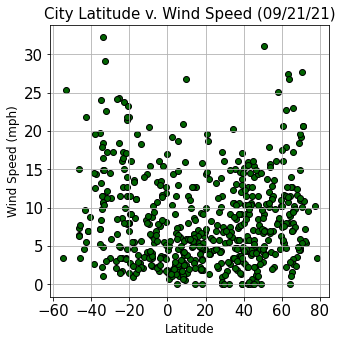

In [139]:
# Generate Wind Speed scatterplot 

Latitude = city_data['Latitude']
Wind = city_data['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("City Latitude v. Wind Speed (09/21/21)", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(Latitude, Wind, marker="o", color="darkgreen",edgecolors='black')
plt.show()

In [ ]:
#This plot shows the relationship between city latitude and wind speed on September 21. The plot shows a slight increase in wind speed at distances from from the equator, but overall, there is no trend.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient = -0.82
Linear regression model: y = -0.69x + 89.05
P-Value = 7.780876278755564e-97


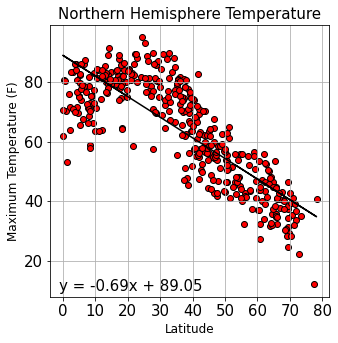

In [143]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="red",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-1,10),fontsize=15,color="black")
plt.show()

In [ ]:
#There is a significant, negative correlation between latitute and maximum temperature in the northern hemisphere; maximum temperature decreases as distance from the equator increases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Correlation coefficient = 0.65
Linear regression model: y = 0.67x + 81.32
P-Value = 3.381220976697981e-22


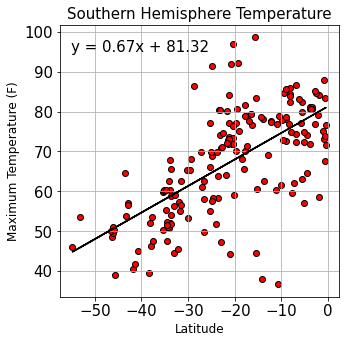

In [144]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Max Temp. (F)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Maximum Temperature (F)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="red",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,95),fontsize=15,color="black")
plt.show()

In [ ]:
#There is a significant positive correlation between latitude and maximum temperature in the southern hemisphere; maximum temperature decreases as distance from the equator increases.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient = -0.05
Linear regression model: y = -0.05x + 71.59
P-Value = 0.36752023097201825


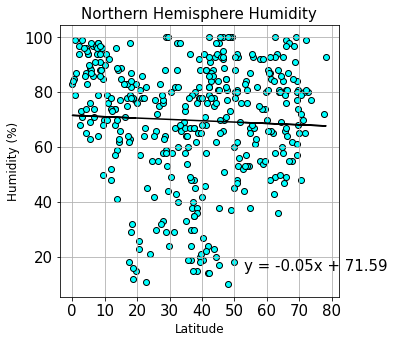

In [145]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Humidity", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="aqua",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(53,15),fontsize=15,color="black")
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Correlation coefficient = 0.09
Linear regression model: y = 0.15x + 70.13
P-Value = 0.2505019732135539


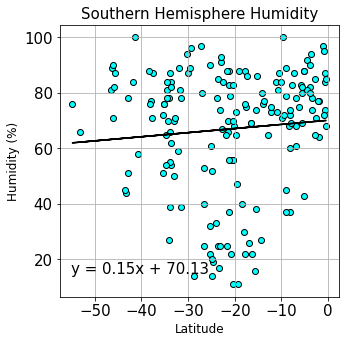

In [146]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Humidity (%)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Humidity", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Humidity (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="aqua",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,15),fontsize=15,color="black")
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent humidity in the northern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient = 0.07
Linear regression model: y = 0.14x + 48.58
P-Value = 0.17739545508180937


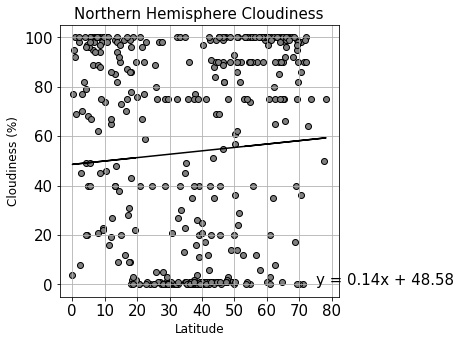

In [147]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Cloudiness", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="grey",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(75,0),fontsize=15,color="black")
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Correlation coefficient = 0.05
Linear regression model: y = 0.14x + 46.72
P-Value = 0.48871716515117225


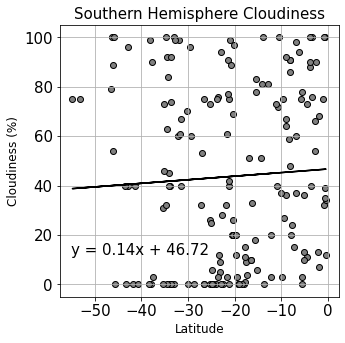

In [150]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Cloudiness (%)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Cloudiness", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Cloudiness (%)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="grey",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-55,12),fontsize=15,color="black")
plt.show()

In [ ]:
#There is no significant correlation between city latitude and percent cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient = 0.26
Linear regression model: y = 0.07x + 5.04
P-Value = 1.2928667704418577e-07


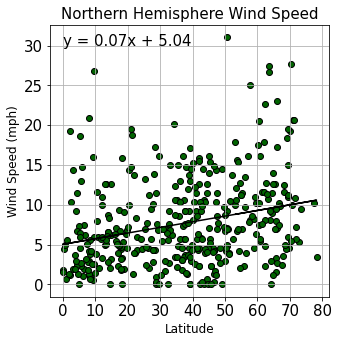

In [153]:
#Group data by northern hemisphere latitutdes
north = city_data.loc[(city_data['Latitude'] > 0)]

#Define x and y coordinates
x = north['Latitude']
y = north['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("Northern Hemisphere Wind Speed", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="darkgreen",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(0,30),fontsize=15,color="black")
plt.show()

In [ ]:
#There is a significantly positive correlation between city latitude and wind speed in the northern hemisphere; wind speed increases with distance from the equator.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Correlation coefficient = -0.23
Linear regression model: y = -0.11x + 7.26
P-Value = 0.0024664673494788894


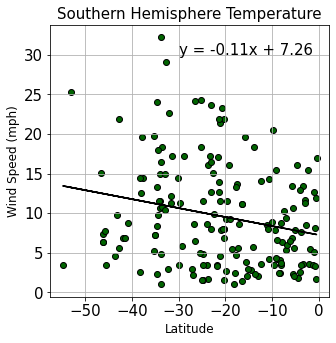

In [158]:
#Group data by southern hemisphere latitutdes
south = city_data.loc[(city_data['Latitude'] < 0)]

#Define x and y coordinates
x = south['Latitude']
y = south['Wind Speed (mph)']

plt.figure(figsize=(5, 5))
plt.title("Southern Hemisphere Temperature", fontsize = '15')
plt.xlabel("Latitude", fontsize = '12')
plt.ylabel("Wind Speed (mph)", fontsize = '12')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
temp_plot = plt.scatter(x, y, marker="o", color="darkgreen",edgecolors='black')

#Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f'Correlation coefficient = {round(rvalue,2)}')
print(f'Linear regression model: {line_eq}')
print(f'P-Value = {pvalue}')
plt.plot(x,regress_values,"black",)
plt.annotate(line_eq,(-30,30),fontsize=15,color="black")
plt.show()

In [ ]:
#There is no significant correlation between wind speed and city latitude in the Southern Hemisphere. 